# Multi-Class Text Classification

## Data Exploration

In [98]:
import pandas as pd

df = pd.read_csv("dataset/bitext_free_dataset.csv", header=0)
df.columns=['utterance', 'category', 'intent']
df = df[:10000]

categories = []
for category in df['category'].unique():
    categories.append(category)

    
df.head()

,utterance,category,intent
0,"I'm not happy with the service, what do I have...",FEEDBACK,complaint
1,do you mind asking Alexa how I could check my ...,ORDER,track_order
2,"ask alexa how to call customer supoort, please",CONTACT,contact_customer_service
3,"I have an issue making a payment, how can I re...",PAYMENT,payment_issue
4,can u ask alexa where to see the cancellation ...,CANCELLATION_FEE,check_cancellation_fee


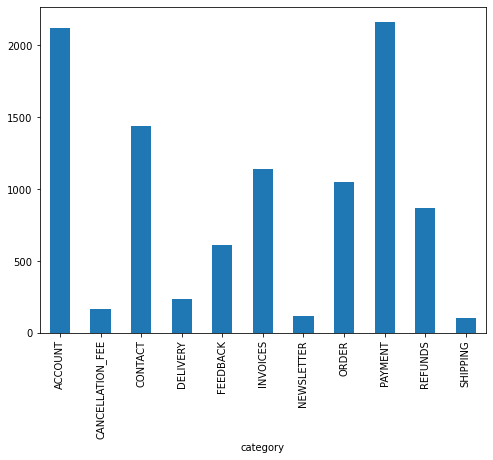

In [99]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (8, 6))
df.groupby('category').utterance.count().plot.bar(ylim=0)

## Text Preprocessing

In [100]:
import nltk
import string
import re


stopwords = nltk.corpus.stopwords.words('english')
       
    
def clean_text(text):
    """
    Convert text to lower case and remove punctuation
    """
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    return text

def tokenize_text(text):
    """
    Break sentences into individual tokens and remove stop words
    """
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

sample = df.sample()

utterance = sample['utterance'].to_string()
utterance = clean_text(utterance)
utterance = tokenize_text(utterance)

print(sample['category'])
print(utterance)

3416    CONTACT
Name: category, dtype: object
['3416', 'u', 'helping', 'u', 'talk', 'human']


## Split Train/Test Data

In [101]:
from sklearn.model_selection import train_test_split

X = df.utterance
y = df.category

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

## Model Training

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

logreg = Pipeline([('vect', CountVectorizer(preprocessor= clean_text, tokenizer= tokenize_text)),
                   ('tfidf', TfidfTransformer()),
                   ('clf', LogisticRegression(n_jobs= -1, C=1e5))])

logreg.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(preprocessor=<function clean_text at 0x0000022ED087CD30>,
                                 tokenizer=<function tokenize_text at 0x0000022ED4766820>)),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0, n_jobs=-1))])

## Model Evaluation

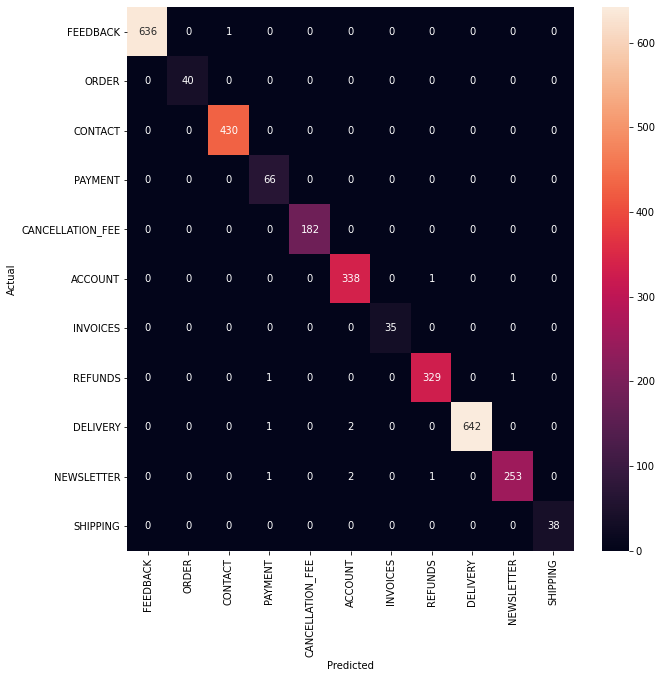

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = logreg.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=categories, yticklabels=categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Model Persistence

In [104]:
from joblib import dump, load

# save the Logistic Regression model to disk
dump(logreg, 'models/logreg.joblib')

['models/logreg.joblib']

In [105]:
# load Logistic Regression model from disk and make prediction
logreg = load('models/logreg.joblib')

y_pred = logreg.predict(x_test)

random_df = df.sample()
print(logreg.predict([random_df['utterance']]))
random_df.head()

['INVOICES']


,utterance,category,intent
9442,"i lost my billp, can u show it?",INVOICES,check_invoices


## Bag-of-Words Example

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

vectorizer = CountVectorizer()

feature_matrix = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
print(feature_matrix.shape)

pd.DataFrame(feature_matrix.toarray(), columns= feature_names)

(4, 9)


,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


## TF-IDF Example

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

tfidf = TfidfVectorizer()

feature_matrix = tfidf.fit_transform(corpus)
feature_names = tfidf.get_feature_names()

pd.DataFrame(feature_matrix.toarray(), columns= feature_names)

,and,document,first,is,one,second,the,third,this
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


## TF formula

$tf_{t,d} = \frac{n_{t,d}}{Number of terms in the document}$

$tf=\frac{1}{5}$



## IDF Formula

$idf_{t} = log\frac{numberofdocuments}{numberofdocumentswith_{t}}$

$idf = log(\frac{4}{4})$

$idf = 0 $

## TF-IDF Formula

$tf_{t,d} \times idf_{t} $

$tf_{t,d} \times idf_{t} = \frac{1}{5} \times log(\frac{4}{4}) = 0$ 

## Logistic Regression hypothesis

$ h _{\theta}^{(i)}(x) $